# 基于神经网络的多分类问题  
这里的分类还20*20像素的手写数字  
前置神经网络感觉就像是多重逻辑回归的组合体  
输入是400个特征加一个常量，输入到隐藏层的25个神经元（也就是25个逻辑回归）  
到隐藏层后是25个特征加一个常量，输入到10个输出层（也就是10个逻辑回归）

In [2]:
from scipy.io import loadmat#读取mat文件
import numpy
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
def getData(url):
    data=loadmat(url)
    x=numpy.array(data['X'])
    x=numpy.insert(x,0,numpy.ones(x.shape[0]),axis=1)
    
    #y还是要加工一下，变成5000*10的形式，方便再求代价的时候直接与向前传播的结果进行计算
    ynum=numpy.array(data['y'])
    y=numpy.zeros((x.shape[0],10))
    for i in range(len(ynum)):
        y[i][ynum[i]-1]=1

    #theta1和theta2分别是输入到隐藏层的和隐藏到输出层的,神经网络初始权重不能全为0
    #theta1=numpy.array(numpy.zeros((25,x.shape[1])))
    #theta2=numpy.array(numpy.zeros((10,26)))#这里直接定义好，隐藏层神经元25个
    theta1=numpy.random.random((25,x.shape[1]))
    theta2=numpy.random.random((10,26))
    return x,y,theta1,theta2
#getData('ex4data1.mat')

先把基本的函数定义出来，代价函数和梯度下降函数  
# 代价函数  
K是分类的数量（就是10）  
<img style="float: left;" src="nn_regcost.png">


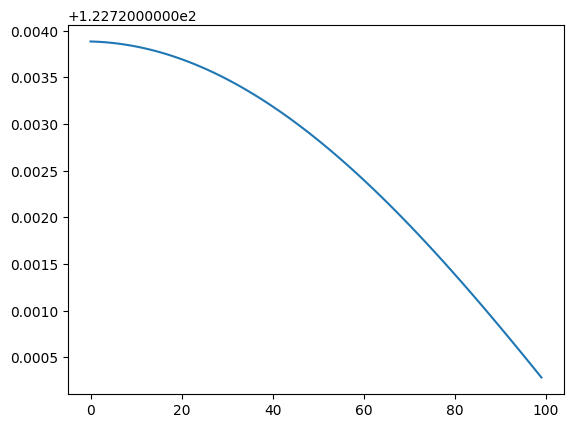

In [3]:
def sigmoid(z):
    return 1/(1+numpy.exp(-z))

#向前传播
def forwardPropagate(x,theta1,theta2):
    hide=sigmoid(x@theta1.T)#隐藏层的值
    hide=numpy.insert(hide,0,numpy.ones(hide.shape[0]),axis=1)#插入一列1
    output=sigmoid(hide@theta2.T)#最终1000样本输出的结果，1000*10
    return hide,output

'''
这里的代价函数看公式是把所有的逻回归的代价求和
单个逻辑回归，知道计算出来的结果和实际结果
但是现在神经网络加了一个隐藏层
（可以知道的是输入和输出以及正确结果，但是隐藏层的正确结果不知道）
看答案的代价函数，只考虑输入与输出，没有计算隐藏层怎么样

'''

def cost(output,y,theta1,theta2,L):
    price=(-y*numpy.log(output)-(1-y)*numpy.log(1-output)).sum()/output.shape[0]#代价
    regul=(numpy.power(theta1,2).sum()+numpy.power(theta2,2).sum())*(L/(2*output.shape[0]))#正则化
    return price+regul

'''
然后开始反向传播
反向传播前先写好基础的sigmoid函数的梯度下降公式，简单求导可知
'''
def gradientSigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

'''
理解反向传播，见笔记新增的连接与图片
代价函数求得的代价是最终结果的误差
这个误差要不断的向后去寻找误差源，简单来说，传播过程中权重比较大的值就说明他贡献的误差较大
以此来不断的向后去更新他们的权重
最终的目的就是求总体对改权重的偏导(通过链式求导法则)
'''
def backPropagate(x,hide,output,y,theta1,theta2):
    #先来一个下降，之后再整合
    #5000*10的矩阵(第一个样本，第一个输出的求导)、5000*25的矩阵(第一个样本，对第一个权重求导)
    totalError=output-y#5000*10
    z1=x@theta1.T#5000*25
    dhz1=gradientSigmoid(z1)#5000*25

    decline1=numpy.zeros((theta1.shape[0],theta1.shape[1]))#25*401
    decline2=numpy.zeros((theta2.shape[0],theta2.shape[1]))#10*26

    costs=[]
    for j in range(100):
        for i in range(totalError.shape[0]):#对5000个样本进行下降
            decline2+=(totalError[i].reshape(-1,1) * theta2)
                                    #1*10      @      10*26  *  25       @          401
            decline1+=numpy.multiply((totalError[i].reshape(-1,1).T@theta2[:,1:]).T,(dhz1[i].reshape(-1,1)@x[i].reshape(-1,1).T))
        theta1=theta1-0.00000001*decline1
        theta2=theta2-0.00000001*decline2
        costs.append(cost(output,y,theta1,theta2,1))
    return costs

def test():
    x,y,theta1,theta2=getData('ex4data1.mat')
    hide,output=forwardPropagate(x,theta1,theta2)
    costs=backPropagate(x,hide,output,y,theta1,theta2)
    plt.plot(costs)

test()